<a href="https://colab.research.google.com/github/cyprian-kiplangat/AIClass/blob/main/mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load the mnist dataset

### Subtask:
Load the MNIST dataset from the sample data directory.


**Reasoning**:
Load the training and testing MNIST datasets into pandas DataFrames.



In [1]:
import pandas as pd

df_train = pd.read_csv('sample_data/mnist_train_small.csv')
df_test = pd.read_csv('sample_data/mnist_test.csv')

print("Training data shape:", df_train.shape)
print("Testing data shape:", df_test.shape)

Training data shape: (19999, 785)
Testing data shape: (9999, 785)


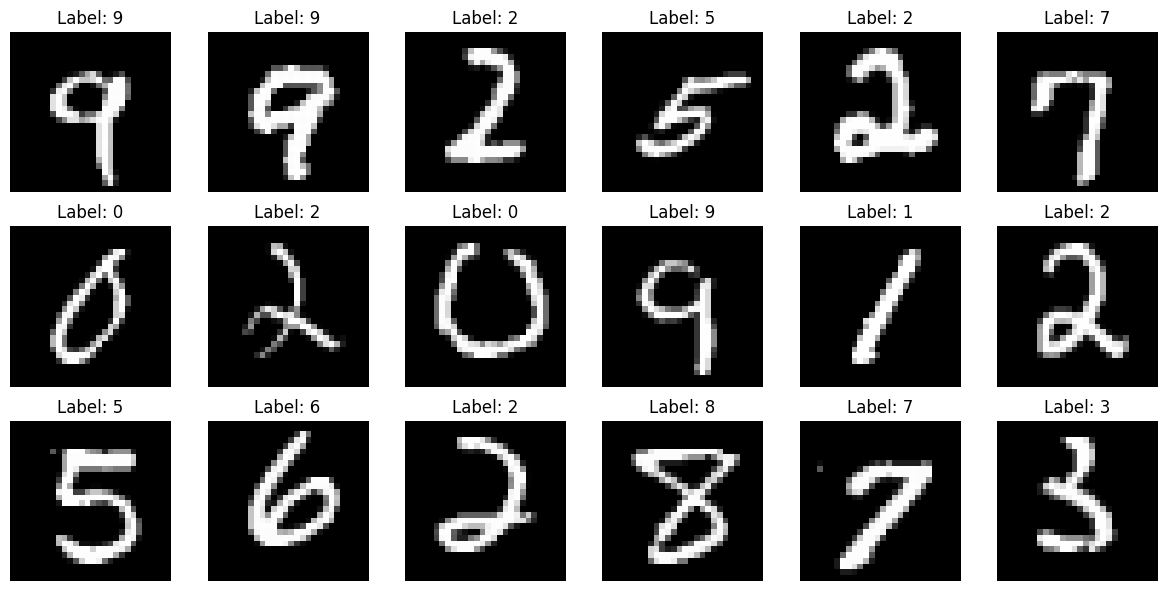

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# # visualize one random of the mnist data
# random_index = np.random.randint(0, len(df_train))
# plt.imshow(df_train.iloc[random_index, 1:].values.reshape(28, 28), cmap='gray')
# plt.title(f"Label: {df_train.iloc[random_index, 0]}")
# plt.show()

# Number of random images to display
num_images = 18

# Create a figure and subplots
fig, axes = plt.subplots(nrows=3, ncols=6, figsize=(12, 6))
axes = axes.flatten() # Flatten the 2D array of axes to easily iterate

# Select random indices
random_indices = np.random.choice(len(df_train), num_images, replace=False)

# Display the images and labels
for i, idx in enumerate(random_indices):
    image_data = df_train.iloc[idx, 1:].values.reshape(28, 28)
    label = df_train.iloc[idx, 0]
    axes[i].imshow(image_data, cmap='gray')
    axes[i].set_title(f"Label: {label}")
    axes[i].axis('off') # Turn off the axes

plt.tight_layout() # Adjust layout to prevent overlapping titles/labels
plt.show()

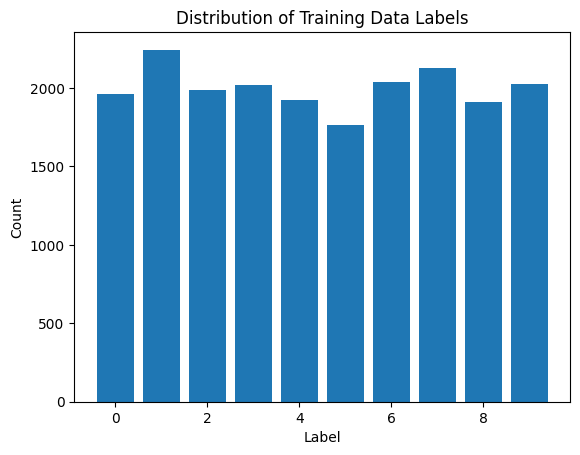

In [16]:
# visualize the distribution of training data labels
label_counts = df_train.iloc[:, 0].value_counts().sort_index()
plt.bar(label_counts.index, label_counts.values)
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of Training Data Labels')
plt.show()

## Preprocess the data

### Subtask:
Normalize the image data and one-hot encode the labels.


**Reasoning**:
Separate features and labels, normalize features, and one-hot encode labels for both training and testing datasets.



In [2]:
import tensorflow as tf

x_train = df_train.iloc[:, 1:].values / 255.0
y_train = df_train.iloc[:, 0].values
x_test = df_test.iloc[:, 1:].values / 255.0
y_test = df_test.iloc[:, 0].values

y_train_encoded = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test_encoded = tf.keras.utils.to_categorical(y_test, num_classes=10)

print("x_train shape:", x_train.shape)
print("y_train_encoded shape:", y_train_encoded.shape)
print("x_test shape:", x_test.shape)
print("y_test_encoded shape:", y_test_encoded.shape)

x_train shape: (19999, 784)
y_train_encoded shape: (19999, 10)
x_test shape: (9999, 784)
y_test_encoded shape: (9999, 10)


## Define the model

### Subtask:
Define a simple neural network model for classifying MNIST digits.


**Reasoning**:
Define a simple neural network model for classifying MNIST digits using Sequential model and Dense layers.



In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout

model = Sequential([
    Flatten(input_shape=(x_train.shape[1],)), # Add Flatten layer
    Dense(128, activation='relu'),
    Dropout(0.2), # Add Dropout layer with a dropout rate of 0.2
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

## Compile the model

### Subtask:
Compile the model with an optimizer, loss function, and metrics.


**Reasoning**:
Compile the defined sequential model with the specified optimizer, loss function, and metrics as per the instructions.



In [25]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## Train the model

### Subtask:
Train the model using the preprocessed training data.


**Reasoning**:
Train the compiled model using the specified training and validation data, number of epochs, and batch size, and store the training history.



In [26]:
history = model.fit(x_train, y_train_encoded, epochs=10, batch_size=32, validation_data=(x_test, y_test_encoded))

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7801 - loss: 0.7331 - val_accuracy: 0.9304 - val_loss: 0.2241
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9347 - loss: 0.2186 - val_accuracy: 0.9468 - val_loss: 0.1752
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9534 - loss: 0.1529 - val_accuracy: 0.9606 - val_loss: 0.1325
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9637 - loss: 0.1183 - val_accuracy: 0.9589 - val_loss: 0.1312
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9685 - loss: 0.1014 - val_accuracy: 0.9643 - val_loss: 0.1171
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9751 - loss: 0.0821 - val_accuracy: 0.9627 - val_loss: 0.1214
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9802 - loss: 0.0676 - val_accuracy: 0.9640 - val_loss: 0.1215
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9817 - loss: 0.0590 - val_accuracy: 0.

## Evaluate the model

### Subtask:
Evaluate the trained model on the test data.


**Reasoning**:
Evaluate the trained model on the test data to assess its performance.



In [27]:
evaluation_results = model.evaluate(x_test, y_test_encoded)
print("Test Loss:", evaluation_results[0])
print("Test Accuracy:", evaluation_results[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9641 - loss: 0.1438
Test Loss: 0.12311296164989471
Test Accuracy: 0.9687969088554382


## Summary:

### Data Analysis Key Findings

*   The training dataset (`mnist_train_small.csv`) contains 19999 samples with 785 columns, and the testing dataset (`mnist_test.csv`) contains 9999 samples with 785 columns.
*   The image data was successfully normalized by scaling pixel values between 0 and 1.
*   The labels were successfully one-hot encoded into a format suitable for multi-class classification, resulting in arrays with a shape of (number\_of\_samples, 10).
*   A sequential neural network model was defined with two hidden dense layers (128 and 64 units) using ReLU activation and an output dense layer (10 units) using softmax activation.
*   The model was compiled using the Adam optimizer and categorical crossentropy as the loss function, with accuracy as the evaluation metric.
*   The model was trained for 10 epochs with a batch size of 32, achieving a training accuracy of approximately 99.57% and a validation accuracy of 96.38% by the final epoch.
*   The model's performance on the test dataset resulted in a Test Loss of 0.1428 and a Test Accuracy of 0.9638.

### Insights or Next Steps

*   The model shows good performance on the test set, indicating it generalizes well to unseen data.
*   Further improvements could be explored by tuning hyperparameters, adding more layers, or using a different model architecture like a Convolutional Neural Network (CNN) which is typically more effective for image classification tasks.


# Testing the model Prediction
Select a random image from the test dataset, preprocess it, use the trained model to predict the digit, and display the image with the predicted label.

## Select a sample image

### Subtask:
Choose a random image and its label from the test dataset.


In [32]:
random_test_index = np.random.randint(0, len(df_test))
random_test_image = df_test.iloc[random_test_index, 1:].values
random_test_label = df_test.iloc[random_test_index, 0]

print("Selected random test image shape:", random_test_image.shape)
print("Selected random test label:", random_test_label)

Selected random test image shape: (784,)
Selected random test label: 1


## Preprocess the sample image

### Subtask:
Reshape and normalize the sample image data to match the format the model expects.


In [33]:
preprocessed_test_image = random_test_image.reshape(1, -1) / 255.0
print("Preprocessed test image shape:", preprocessed_test_image.shape)

Preprocessed test image shape: (1, 784)


## Make a prediction

### Subtask:
Use the trained model to predict the digit in the sample image.


In [34]:
predictions = model.predict(preprocessed_test_image)
predicted_label = np.argmax(predictions)

print("Predicted label:", predicted_label)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Predicted label: 1


## Visualize the result

### Subtask:
Display the sample image and the model's predicted label.


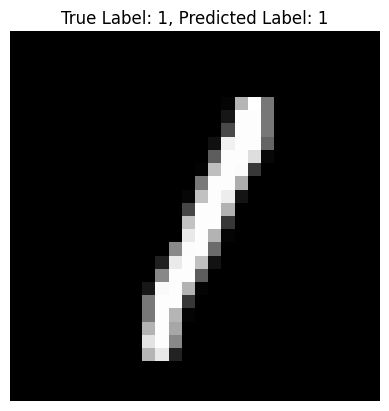

In [35]:
plt.imshow(random_test_image.reshape(28, 28), cmap='gray')
plt.title(f"True Label: {random_test_label}, Predicted Label: {predicted_label}")
plt.axis('off')
plt.show()